In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conversion_rates = {
    'Launched.Price.Pakistan.PKR': 0.0036,
    'Launched.Price.India.INR': 0.011,
    'Launched.Price.China.CNY': 0.14,
    'Launched.Price.USA.USD': 1,
    'Launched.Price.Dubai.AED': 0.27
}

df = pd.read_csv("mobiles_dataset.csv")

def convert_to_usd(row):
    for col, rate in conversion_rates.items():
        if col in row:
            row[col] *= rate
    return row

df = df.apply(convert_to_usd, axis=1)

df['Average_Launched_Price_USD'] = df[
    ['Launched.Price.Pakistan.PKR', 'Launched.Price.India.INR', 'Launched.Price.China.CNY', 'Launched.Price.USA.USD', 'Launched.Price.Dubai.AED']
].mean(axis=1)





# Problem 1.1


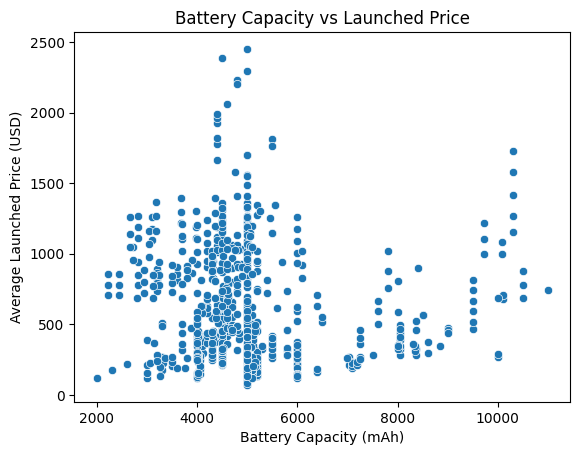

Correlation between Battery Capacity and Launched Price: -0.0423


In [2]:
sns.scatterplot(x=df['Battery.Capacity.mAh'], y=df['Average_Launched_Price_USD'])
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Average Launched Price (USD)")
plt.title("Battery Capacity vs Launched Price")
plt.show()

correlation = df["Battery.Capacity.mAh"].corr(df["Average_Launched_Price_USD"])
print(f"Correlation between Battery Capacity and Launched Price: {correlation:.4f}")

# Question
Does battery capacity influence the launched price of a smartphone? Check this variability
across all currencies. Is there any type of difference between behaviors?

# Answer
No, from the graph we can see no visual correlation between the battery capacity on th e price of a smartphone. I also calculated the correlation between them and it was very close to 0 which means there is no statistical correlation between them.


# Problem 1.2


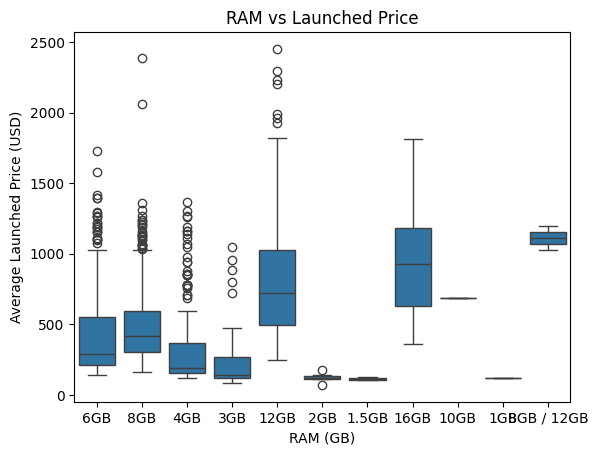

In [3]:
sns.boxplot(x=df['RAM'], y=df['Average_Launched_Price_USD'])
plt.xlabel("RAM (GB)")
plt.ylabel("Average Launched Price (USD)")
plt.title("RAM vs Launched Price")
plt.show()

# Question
Does RAM size impact the price of smartphones? Check this variability across all currencies.
Is there any type of difference between behaviors?

# Answer
Yes we can see that there is some behavioral difference based on the Ram. We can see that heigher the RAM size is the heigher the price range is. (In the visualization the Ram sizes are not in order)

# Problem 1.3

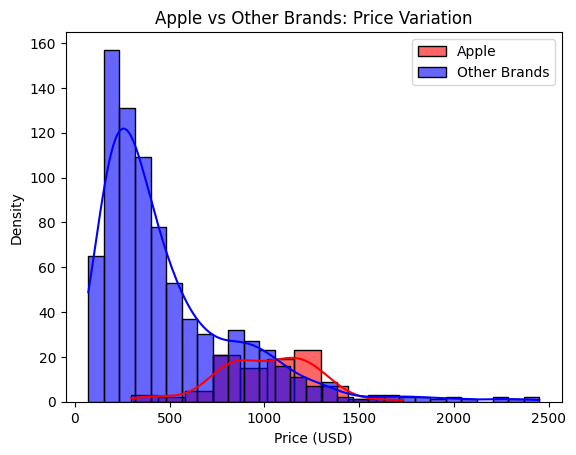

<ipython-input-4-bf12c7d779c4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df['Max_Markup_Country'] = apple_df[['Launched.Price.Pakistan.PKR', 'Launched.Price.India.INR', 'Launched.Price.China.CNY', 'Launched.Price.USA.USD', 'Launched.Price.Dubai.AED']].idxmax(axis=1)
<ipython-input-4-bf12c7d779c4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=markup_counts.index, y=markup_counts.values, palette='coolwarm')


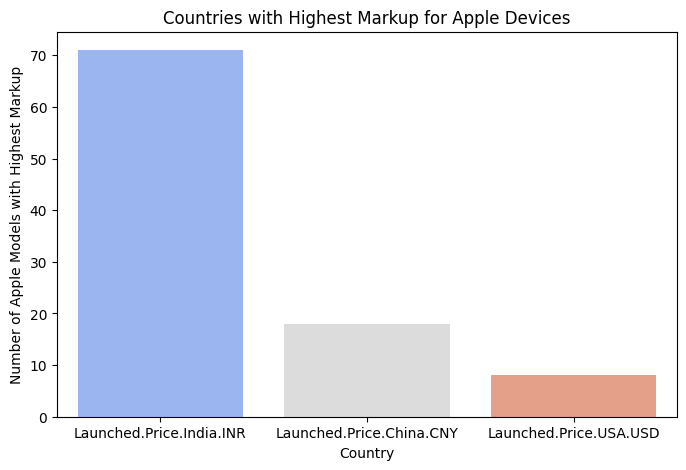

<ipython-input-4-bf12c7d779c4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_std.index, y=price_std['Average_STD'], palette='viridis')


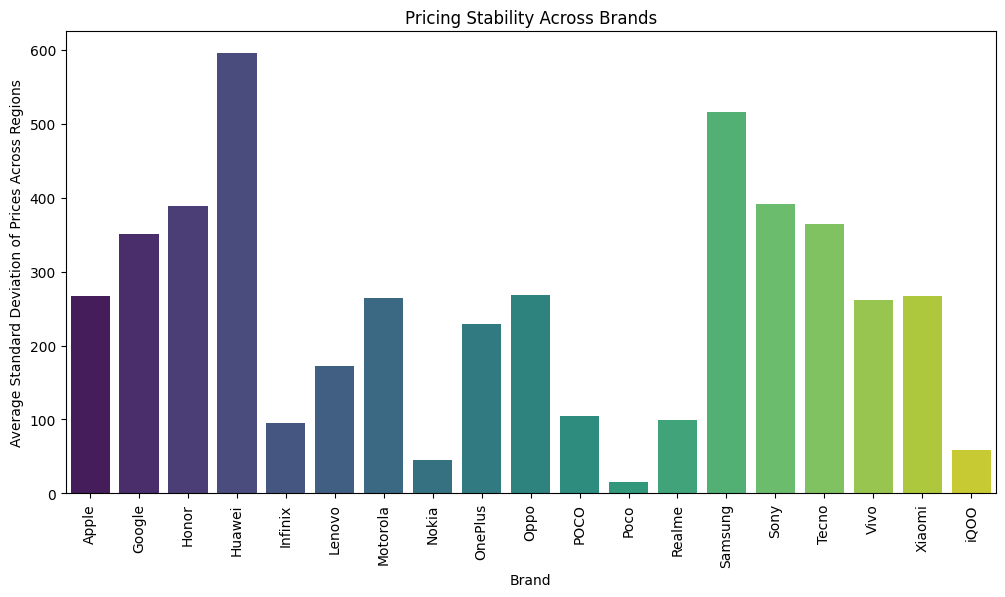

In [4]:
apple_prices = df[df['Company.Name'] == 'Apple']['Average_Launched_Price_USD']
other_prices = df[df['Company.Name'] != 'Apple']['Average_Launched_Price_USD']

sns.histplot(apple_prices, kde=True, label='Apple', color='red', alpha=0.6)
sns.histplot(other_prices, kde=True, label='Other Brands', color='blue', alpha=0.6)
plt.legend()
plt.xlabel("Price (USD)")
plt.ylabel("Density")
plt.title("Apple vs Other Brands: Price Variation")
plt.show()

apple_df = df[df['Company.Name'] == 'Apple']
apple_df['Max_Markup_Country'] = apple_df[['Launched.Price.Pakistan.PKR', 'Launched.Price.India.INR', 'Launched.Price.China.CNY', 'Launched.Price.USA.USD', 'Launched.Price.Dubai.AED']].idxmax(axis=1)

markup_counts = apple_df['Max_Markup_Country'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=markup_counts.index, y=markup_counts.values, palette='coolwarm')
plt.xlabel("Country")
plt.ylabel("Number of Apple Models with Highest Markup")
plt.title("Countries with Highest Markup for Apple Devices")
plt.show()

price_std = df.groupby('Company.Name')[['Launched.Price.Pakistan.PKR', 'Launched.Price.India.INR', 'Launched.Price.China.CNY', 'Launched.Price.USA.USD', 'Launched.Price.Dubai.AED']].std()
price_std['Average_STD'] = price_std.mean(axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x=price_std.index, y=price_std['Average_STD'], palette='viridis')
plt.xlabel("Brand")
plt.ylabel("Average Standard Deviation of Prices Across Regions")
plt.title("Pricing Stability Across Brands")
plt.xticks(rotation=90)
plt.show()

# Question
Do Apple devices have a higher price variation across different regions compared to other
brands? In which country do Apple devices have the highest markup? Are there brands with
more stable pricing across regions?

# Answer
As expected we can see that the prices of Apple devices are heihger than the prices ofother devices. The mean and concentration of apple device prices is heigher than for other devices.

Based on the second visualization we can see that apple devices have heighest markup in india.

The 3rd visualization shows the standard deviation of the prices for each Brand. The lower it is more stable the prices are. From the visualization we can see that Poco is the most stable regarding it's prices.

# Problem 1.4

<ipython-input-5-c3317018ad23>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_segments = df.groupby(['Company.Name', 'Segment']).size().unstack().fillna(0)


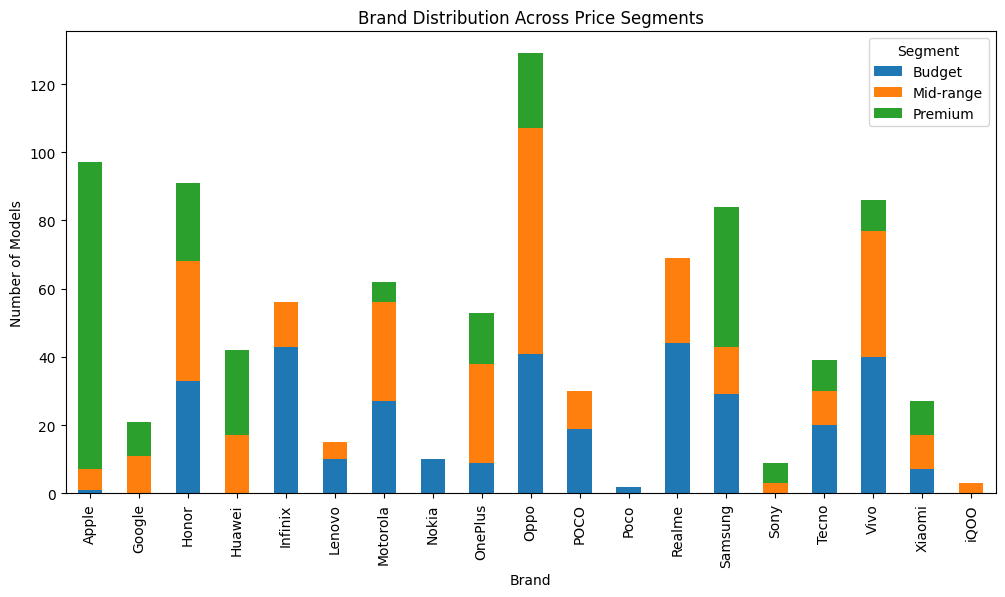

In [5]:
conditions = [
    df['Average_Launched_Price_USD'] < 300,
    (df['Average_Launched_Price_USD'] >= 300) & (df['Average_Launched_Price_USD'] <= 700),
    df['Average_Launched_Price_USD'] > 700
]
categories = ['Budget', 'Mid-range', 'Premium']
df['Segment'] = pd.cut(df['Average_Launched_Price_USD'], bins=[0, 300, 700, float('inf')], labels=categories)

brand_segments = df.groupby(['Company.Name', 'Segment']).size().unstack().fillna(0)
brand_segments.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Brand")
plt.ylabel("Number of Models")
plt.title("Brand Distribution Across Price Segments")
plt.xticks(rotation=90)
plt.show()



# Question
Do all smartphone brands have flagship and budget-friendly models, or do some brands
only focus on premium devices?

# Answer
From the visualization we can see that different brands have focus on different price segments. For example brands like google, apple and huawei are mainly focused on premium and have some mid range devices. While some brands Poko, Nokia and Lenovo are mainly focusing on budget devices. And there are companies like Oppo, Samsung and OnePlus which are more diversified and have devices in all price segments.

# Problem 1.5

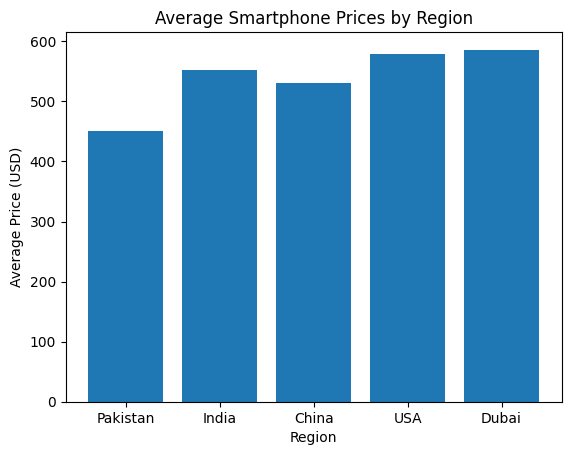

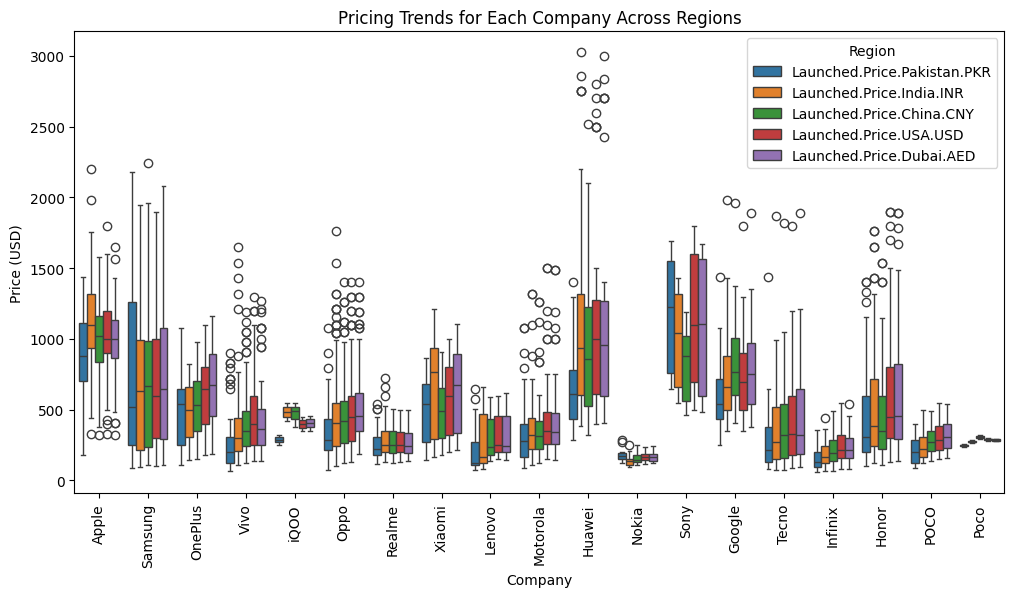

In [6]:
region_means = {
    'Pakistan': df['Launched.Price.Pakistan.PKR'].mean(),
    'India': df['Launched.Price.India.INR'].mean(),
    'China': df['Launched.Price.China.CNY'].mean(),
    'USA': df['Launched.Price.USA.USD'].mean(),
    'Dubai': df['Launched.Price.Dubai.AED'].mean()
}

plt.bar(region_means.keys(), region_means.values())
plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.title("Average Smartphone Prices by Region")
plt.show()

plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=['Company.Name'], value_vars=['Launched.Price.Pakistan.PKR', 'Launched.Price.India.INR', 'Launched.Price.China.CNY', 'Launched.Price.USA.USD', 'Launched.Price.Dubai.AED'], var_name='Region', value_name='Price')
sns.boxplot(x='Company.Name', y='Price', hue='Region', data=df_melted)
plt.xticks(rotation=90)
plt.xlabel("Company")
plt.ylabel("Price (USD)")
plt.title("Pricing Trends for Each Company Across Regions")
plt.legend(title="Region")
plt.show()


# Question
Which region offers the most affordable smartphone prices on average? Are there any
brands that price their phones significantly lower in one region compared to others?

# Answer
From the first visualization we can see that the prices average price for a device is the lowest in Pakistan.

From the second visualization we can see that each brand has unique branding for each region. For most of the companies pakistan is the region where devices are priced lowest. But some companies have other regions where prices are the lowest like Sony who's lowest pricing for devices is China. Or for Oneplus lowest average priced region is India. So even though overall average lowest prices are in Pakistan each brand has its unique priceing in each region.

# Problem 2

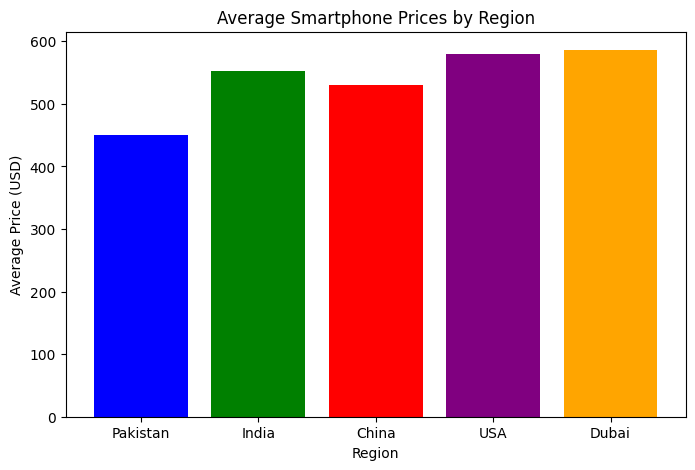

In [7]:
plt.figure(figsize=(8, 5))
plt.bar(region_means.keys(), region_means.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.title("Average Smartphone Prices by Region")
plt.show()

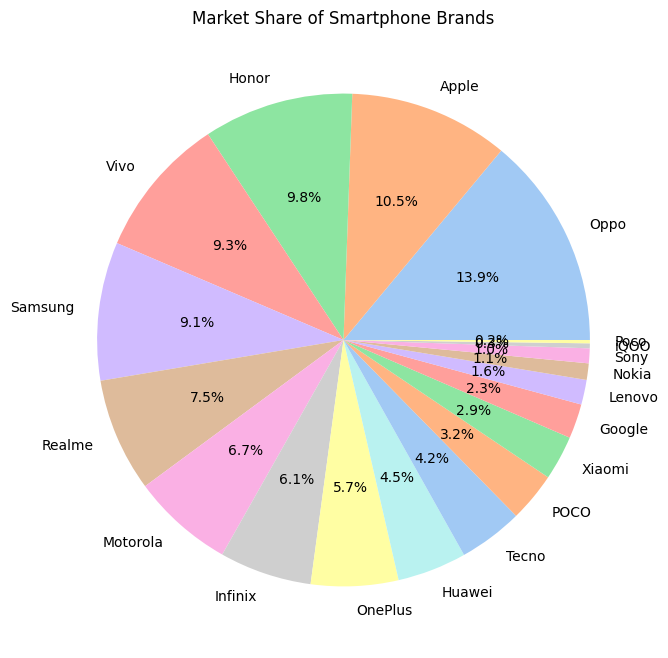

In [8]:
brand_counts = df['Company.Name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Market Share of Smartphone Brands")
plt.show()

# Problem 4


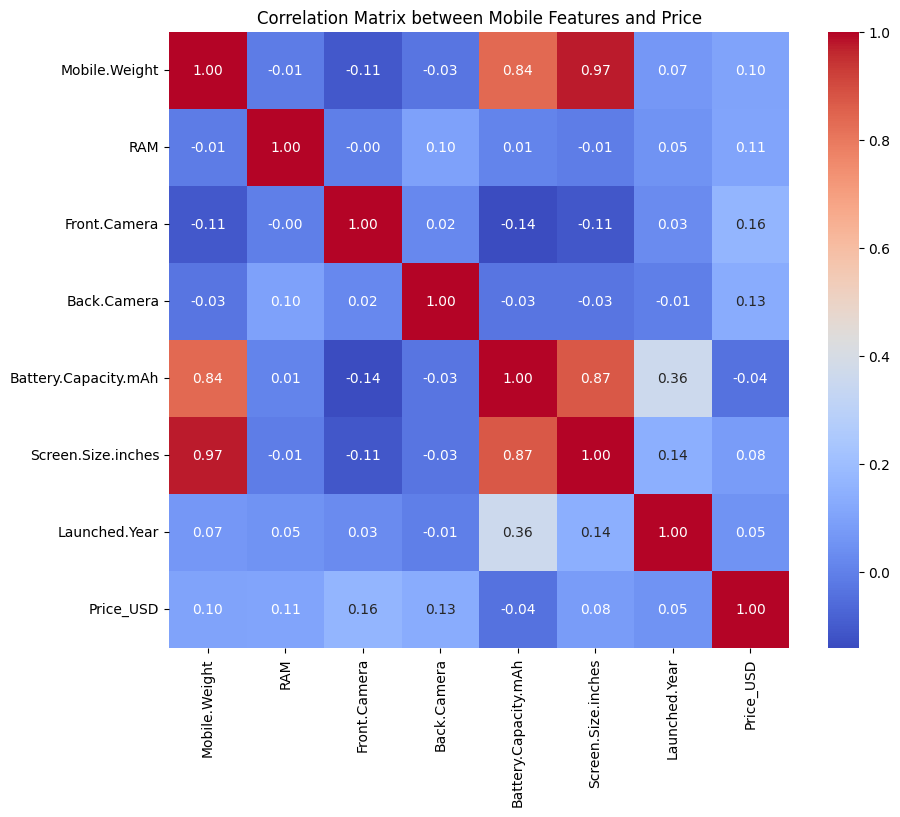

In [14]:
def extract_numeric(s):
    if isinstance(s, str):
        # Remove non-digit characters (including potential decimal point)
        return float(''.join(ch for ch in s if ch.isdigit() or ch=='.'))
    return s

df['Price_USD'] = df['Launched.Price.USA.USD']
df['RAM'] = df['RAM'].apply(extract_numeric)
df['Mobile.Weight'] = df['Mobile.Weight'].apply(extract_numeric)
df['Front.Camera'] = df['Front.Camera'].apply(extract_numeric)
df['Back.Camera'] = df['Back.Camera'].apply(extract_numeric)

numeric_features = ['Mobile.Weight', 'RAM', 'Front.Camera', 'Back.Camera',
                    'Battery.Capacity.mAh', 'Screen.Size.inches', 'Launched.Year', 'Price_USD']

# Compute the correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Mobile Features and Price')
plt.show()


From this simple correlation matrix we can see that there are not very many strongly correlated variables. Only corelated variables ar Battery, Screen with the weight and Battery with screen size. This is logical as the size of the screen is the size of the phone which means heigher it is heigher the weight. Same goes for battery and screen size as bigger phones give the manufacturers posability for bigger batteries.

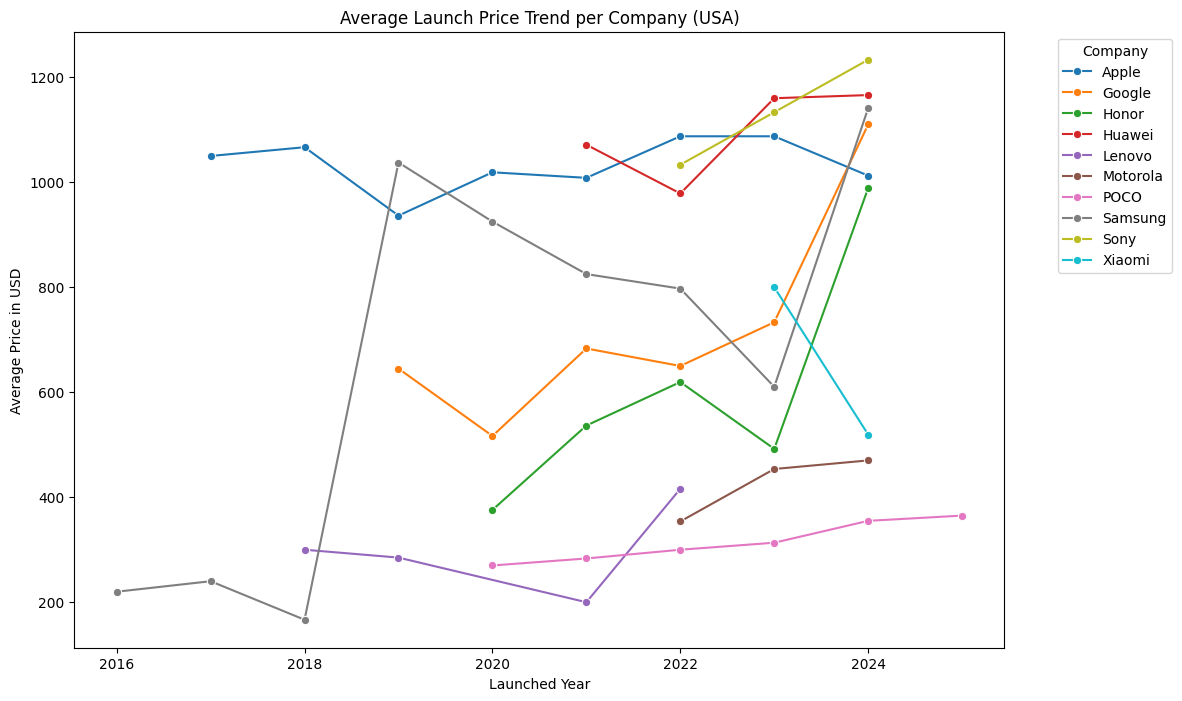

In [19]:
company_year_price = df.groupby(["Company.Name", "Launched.Year"])["Price_USD"].mean().reset_index()

companies = ["Apple", "Google", "Honor", "Huawei", "Lenovo", "Samsung", "Sony", "Xiaomi", "Motorola", "POCO"]
filtered_company_year_price = company_year_price[company_year_price["Company.Name"].isin(companies)]

plt.figure(figsize=(12, 8))
sns.lineplot(x="Launched.Year", y="Price_USD", hue="Company.Name", data=filtered_company_year_price, marker="o")
plt.title("Average Launch Price Trend per Company (USA)")
plt.xlabel("Launched Year")
plt.ylabel("Average Price in USD")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


I took most interesting companies and wanted to anderstand if their average price for devices has gone up during the years. For most of them it has. There are 2 companies that have tried to keep their prices stable but most of them have had huge jumps in the avarage price. This shows that the devices have been getting more expensive. But it does not consider inflation or any other possible factors that could effect it.